In [2]:
from google.colab import files
uploaded=files.upload()

Saving processed_dataset.csv to processed_dataset (2).csv


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
df=pd.read_csv("processed_dataset.csv")

In [5]:
print(df.isnull().sum())#no null values
print(df.describe())

Timestamp                    0
Longitude                    0
Latitude                     0
Speed                        0
Operatorname                 0
Node                         0
CellID                       0
LAC                          0
NetworkTech                  0
Level                        0
Qual                         0
SNR                          0
CQI                          0
ARFCN                        0
DL_bitrate                   0
UL_bitrate                   0
PSC                          0
Altitude                     0
Accuracy                     0
State                        0
SERVINGTIME                  0
BANDWIDTH                    0
SecondCell_NODE              0
SecondCell_CELLID            0
SecondCell_RSRP              0
SecondCell_SNR               0
SecondCell_PSC               0
SecondCell_ARFCN             0
NTech1                       0
NCellid1                     0
NLAC1                        0
NCell1                       0
NARFCN1 

In [50]:
df.columns

Index(['Timestamp', 'Longitude', 'Latitude', 'Speed', 'Operatorname', 'Node',
       'CellID', 'LAC', 'NetworkTech', 'Level', 'Qual', 'SNR', 'CQI', 'ARFCN',
       'DL_bitrate', 'UL_bitrate', 'PSC', 'Altitude', 'Accuracy', 'State',
       'SERVINGTIME', 'BANDWIDTH', 'SecondCell_NODE', 'SecondCell_CELLID',
       'SecondCell_RSRP', 'SecondCell_SNR', 'SecondCell_PSC',
       'SecondCell_ARFCN', 'NTech1', 'NCellid1', 'NLAC1', 'NCell1', 'NARFCN1',
       'NRxLev1', 'NQual1', 'Test_Status', 'Mobility', 'Node_Longitude',
       'Node_Latitude', 'SessionID', 'ElapsedTime', 'NCellid1_missing',
       'SecondCell_NODE_missing', 'SecondCell_CELLID_missing',
       'SecondCell_PSC_missing', 'SecondCell_ARFCN_missing', 'NLAC1_missing',
       'NCell1_missing', 'NARFCN1_missing', 'CQI_missing', 'BANDWIDTH_missing',
       'SecondCell_RSRP_missing', 'SecondCell_SNR_missing', 'NRxLev1_missing',
       'NQual1_missing'],
      dtype='object')

In [51]:
x=df[[ 'Longitude', 'Latitude', 'Altitude','Speed', 'Operatorname','NetworkTech','Qual', 'SNR', 'CQI', 'DL_bitrate', 'UL_bitrate','BANDWIDTH','SecondCell_RSRP','SecondCell_SNR','NRxLev1','NQual1','LAC']]
y=df['Level']

print(x.head())
print(y.head())

    Longitude  Latitude  Altitude  Speed Operatorname NetworkTech  Qual   SNR  \
0  101.604079  3.067269      35.0    0.0   Operator C          5G -10.0   0.0   
1  101.604065  3.067274      35.0    2.0   Operator C          5G  -9.0   1.0   
2  101.604118  3.067221      35.0    1.0   Operator C          4G -20.0 -10.0   
3  101.604106  3.067208      35.0    1.0   Operator C          4G -17.0   0.0   
4  101.604100  3.067232      35.0    0.0   Operator C          5G  -9.0   3.0   

   CQI  DL_bitrate  UL_bitrate  BANDWIDTH  SecondCell_RSRP  SecondCell_SNR  \
0    6         0.0         0.0       20.0            -94.0            -7.0   
1    6         0.0         0.0       20.0            -93.0           -10.0   
2    6         0.0         0.0       20.0            -81.0            -2.0   
3   14         0.0         1.0       20.0            -81.0            -2.0   
4   11         0.0         0.0       20.0            -85.0            -3.0   

   NRxLev1  NQual1     LAC  
0    -94.0   -2

In [52]:
X_Train,X_Test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [53]:
#Encoding features
X_Train=pd.get_dummies(X_Train,columns=['Operatorname','NetworkTech'])
X_Test=pd.get_dummies(X_Test,columns=['Operatorname','NetworkTech'])

In [54]:
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_Train,y_train)
y_pred=model.predict(X_Test)

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("mean squared error:", mse)
print('coefficient of determination:', r2)

mean squared error: 12.246549318460193
coefficient of determination: 0.8994423254081515


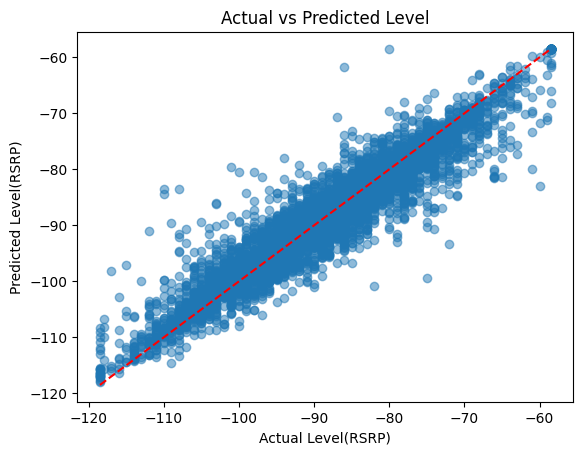

In [55]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')# perfect prediction line
plt.xlabel('Actual Level(RSRP)')
plt.ylabel('Predicted Level(RSRP)')
plt.title('Actual vs Predicted Level')
plt.show()

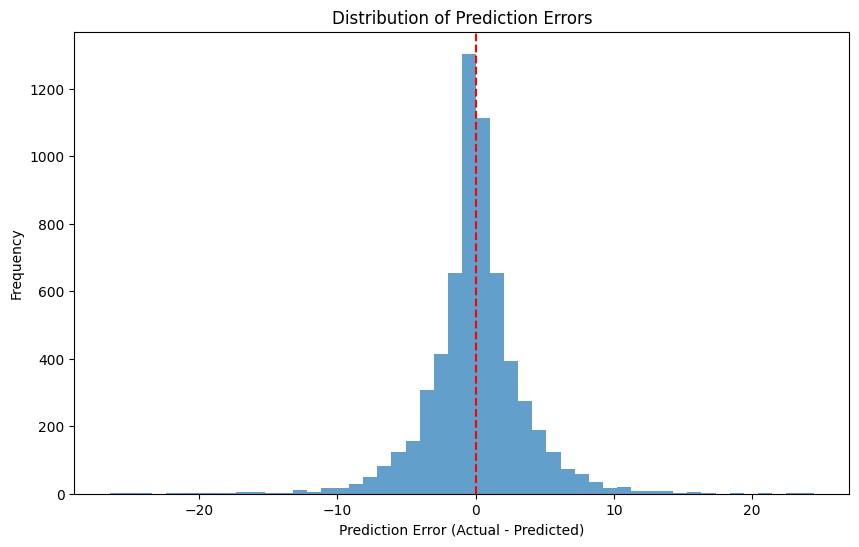

Mean Error: 0.02324680679062249
Error Std:  3.499712727859667


In [56]:
# Analyze where the model makes mistakes
errors = y_test-y_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, alpha=0.7)
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.axvline(x=0,color='r',linestyle='--')
plt.show()

print(f"Mean Error:", errors.mean())
print(f"Error Std: ",errors.std())

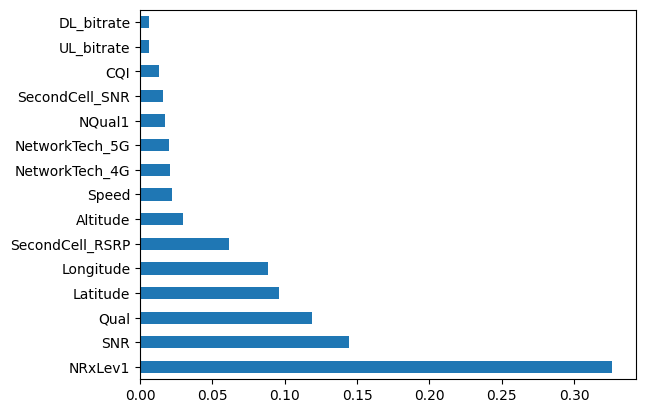

In [67]:
feat_importances = pd.Series(model.feature_importances_, index=X_Train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [73]:
scores=feat_importances.sort_values(ascending=False).head(15)

In [81]:
feature_table = pd.DataFrame({
    'Feature': ['NRxLev1', 'SNR', 'Qual', 'Latitude', 'Longitude', 'SecondCell_RSRP',
                'Altitude', 'Speed', 'NetworkTech_4G', 'NetworkTech_5G', 'NQual1',
                'SecondCell_SNR', 'CQI', 'UL_bitrate', 'DL_bitrate'],
   'Feature_descriptions' : [
    'Neighbor cell signal strength',
    'Signal-to-noise ratio',
    'Signal quality',
    'User location latitude',
    'User location longitude',
    'Second cell signal level',
    'User altitude',
    'User movement speed',
    '4G network indicator',
    '5G network indicator',
    'Neighbor cell quality',
    'Second cell SNR',
    'Channel quality indicator',
    'Upload speed affected by signal strength',
    'Download speed affected by signal strength'
   ],
    'Importance': [round(score, 3) for score in scores]
})

feature_table

,Feature,Feature_descriptions,Importance
0,NRxLev1,Neighbor cell signal strength,0.327
1,SNR,Signal-to-noise ratio,0.144
2,Qual,Signal quality,0.119
3,Latitude,User location latitude,0.096
4,Longitude,User location longitude,0.088
5,SecondCell_RSRP,Second cell signal level,0.061
6,Altitude,User altitude,0.030
7,Speed,User movement speed,0.022
8,NetworkTech_4G,4G network indicator,0.021
9,NetworkTech_5G,5G network indicator,0.020
